In [2]:
from sympy import *
from sympy.stats import *
init_printing(use_unicode=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
y, mu, mu0 = symbols('y mu mu0', real=True)
Y_vec = symbols('Y1:4', real=True)
tau, lambda0, a0, b0 = symbols('tau lambda0 a0 b0', positive=True)

In [6]:
p_y = density(Normal('', mu, 1/sqrt(tau)))(y)
p_mu = density(Normal('', mu0, 1/sqrt(lambda0*tau)))(mu)
p_tau = density(Gamma('', a0, 1/b0))(tau)

In [10]:
integrate(p_mu, (mu, -oo, oo))
integrate(p_tau, (tau, 0, oo))
simplify(integrate(p_tau, (tau, 0, oo)))

In [9]:
log_p = sum([log(p_y.subs(y, x)) for x in Y_vec]) + log(p_mu) + log(p_tau)
log_p = simplify(log_p)
log_p

In [15]:
log_p_for_mu = integrate(diff(log_p, mu), mu)
log_p_for_mu = collect(log_p_for_mu, mu)
log_p_for_mu

In [18]:
log_p_for_tau = integrate(diff(log_p, tau), tau)
log_p_for_tau = collect(log_p_for_tau, tau)
log_p_for_tau

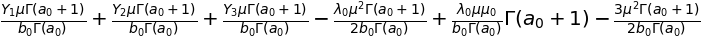

In [19]:
log_q1_mu = integrate(log_p_for_mu * p_tau, (tau, 0, oo))
log_q1_mu
log_q1_mu = simplify(log_q1_mu)
log_q1_mu
log_q1_mu = collect(expand(log_q1_mu), mu)
log_q1_mu

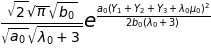

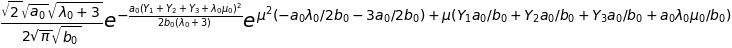

In [20]:
q1_mu = exp(log_q1_mu)
const = simplify(integrate(q1_mu, (mu, -oo, oo)))
const
q1_mu = 1/const * exp(log_q1_mu)
q1_mu

In [21]:
log_q1_tau = integrate(log_p_for_tau * p_mu, (mu, -oo, oo))
log_q1_tau
log_q1_tau = integrate(diff(log_q1_tau, tau), tau)
log_q1_tau
log_q1_tau = collect(log_q1_tau, tau)
log_q1_tau

In [23]:
q1_tau = logcombine(exp(log_q1_tau))
q1_tau
# const = integrate(q1_tau, (tau, 0, oo))
# const
# q1_tau = 1/const * q1_tau
# q1_tau

In [24]:
coef = collect(log_q1_tau, tau).coeff(tau)
coef
sol = solve(diff(coef, Y_vec[0]), Y_vec[0])[0]
sol #=> mu0
replacements = [(var, sol) for var in Y_vec]
coef.subs(replacements) #=> -b0

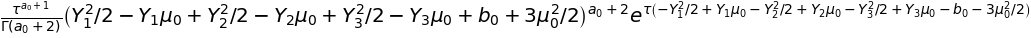

In [25]:
xi = symbols('xi', positive=True)
const = simplify(integrate(tau**(a0+1)*exp(-xi*tau), (tau, 0, oo)))
const = const.subs(xi, -coef)
const
q1_tau = 1/const * q1_tau
q1_tau